In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2025, 10, 1)

df = yf.download(stock, start, end)

/tmp/ipython-input-3539236066.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,31.768667,34.579216,26.258098,28.358115,855215656
2007-10-08,30.142347,32.842369,29.952871,32.842369,126671715
2007-10-09,32.194996,32.479208,28.531809,30.158136,116725709
2007-10-10,32.494984,33.158147,32.210772,33.031829,67931378
2007-10-11,36.126591,37.895026,32.210773,37.895026,106320954


In [ ]:
df.shape

(4435, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4435 entries, 2007-10-05 to 2025-09-30
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4435 non-null   float64
 1   (High, POWERGRID.NS)    4435 non-null   float64
 2   (Low, POWERGRID.NS)     4435 non-null   float64
 3   (Open, POWERGRID.NS)    4435 non-null   float64
 4   (Volume, POWERGRID.NS)  4435 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 207.9 KB


In [ ]:
df.isnull().sum()

,,0
Price,Ticker,
Close,POWERGRID.NS,0
High,POWERGRID.NS,0
Low,POWERGRID.NS,0
Open,POWERGRID.NS,0
Volume,POWERGRID.NS,0


In [ ]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4435.000000,4435.000000,4435.000000,4435.000000,4.435000e+03
mean,89.230174,90.368912,88.113605,89.274687,1.192548e+07
std,77.990296,78.884377,77.084190,77.998140,2.013400e+07
min,18.548231,19.827419,16.629449,19.731480,0.000000e+00
25%,36.011656,36.582478,35.546750,36.056438,4.935334e+06
50%,65.565903,66.432012,64.497101,65.432133,8.544753e+06
75%,98.485218,99.994017,96.907132,98.247689,1.378587e+07
max,354.580750,355.356950,346.576122,353.222365,8.552157e+08


In [ ]:
df = df.reset_index()

In [ ]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [ ]:
df.to_csv("powergrid.csv")

In [ ]:
data01 = pd.read_csv("powergrid.csv")

In [ ]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,31.768667221069336,34.57921595595695,26.258097754841593,28.358114831039718,855215656
2,1,2007-10-08,30.14234733581543,32.84236871898743,29.952871324448566,32.84236871898743,126671715
3,2,2007-10-09,32.19499588012695,32.479207764711006,28.53180858103731,30.158136188070426,116725709
4,3,2007-10-10,32.4949836730957,33.15814730449772,32.21077191198066,33.03182930053533,67931378


In [ ]:
# Candlesticks
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'],
                                    high = data01['High'],
                                    low = data01['Low'],
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [ ]:
df = df.drop(('Date', ''), axis = 1)

KeyError: ('Date', '')

In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,31.768667,34.579216,26.258098,28.358115,855215656
1,30.142347,32.842369,29.952871,32.842369,126671715
2,32.194996,32.479208,28.531809,30.158136,116725709
3,32.494984,33.158147,32.210772,33.031829,67931378
4,36.126591,37.895026,32.210773,37.895026,106320954


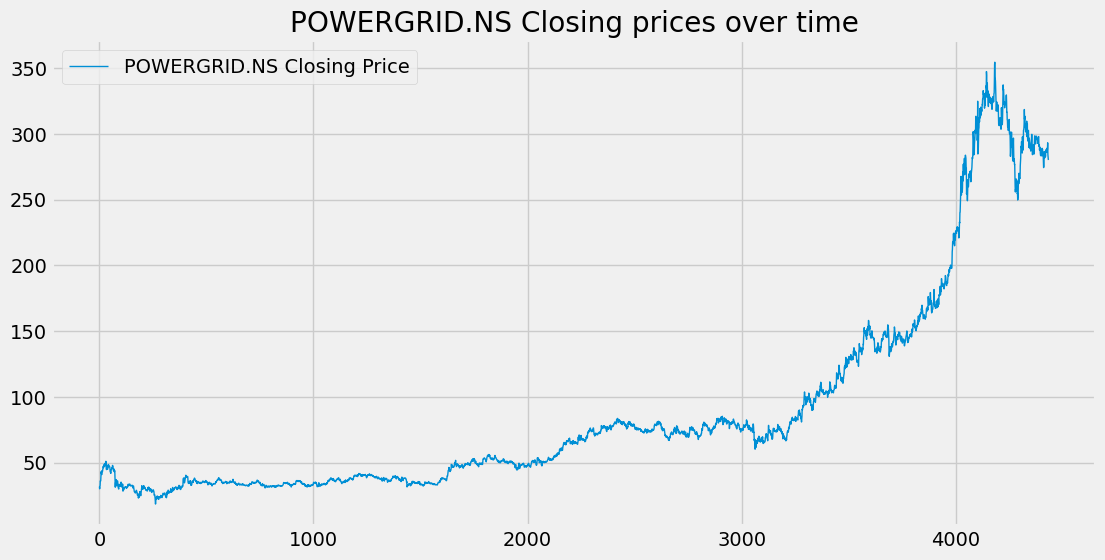

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

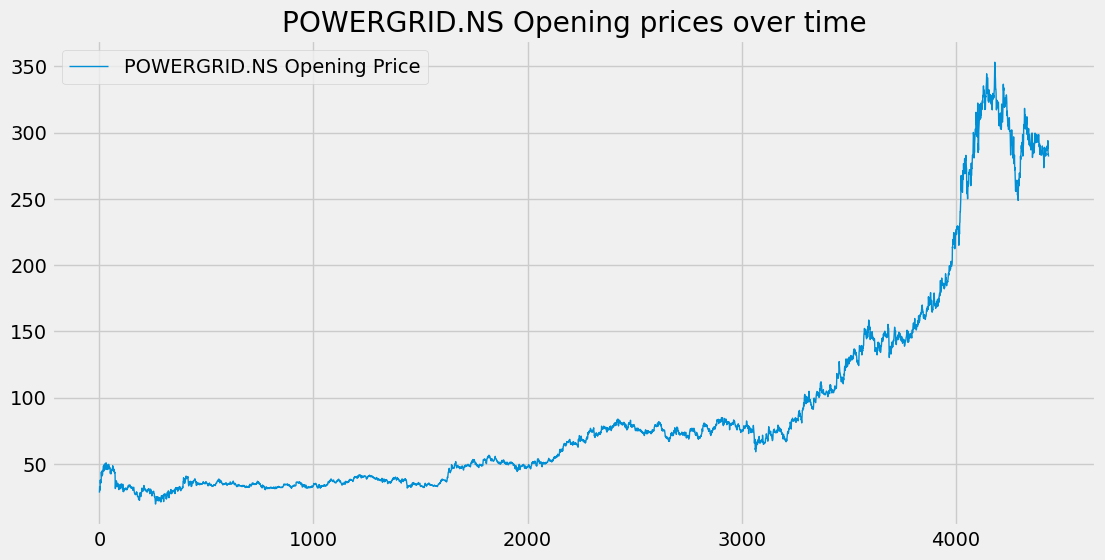

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

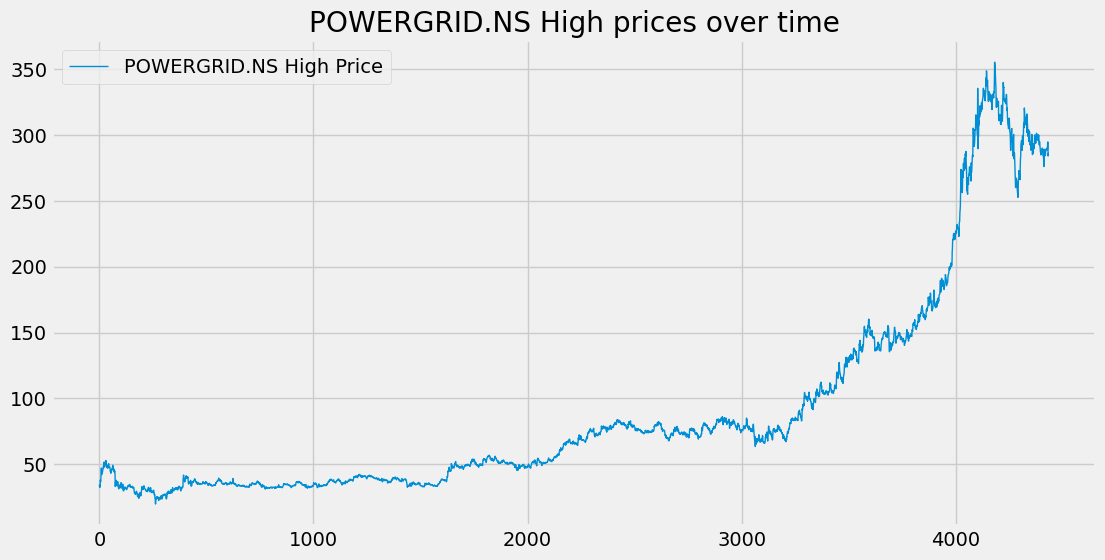

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

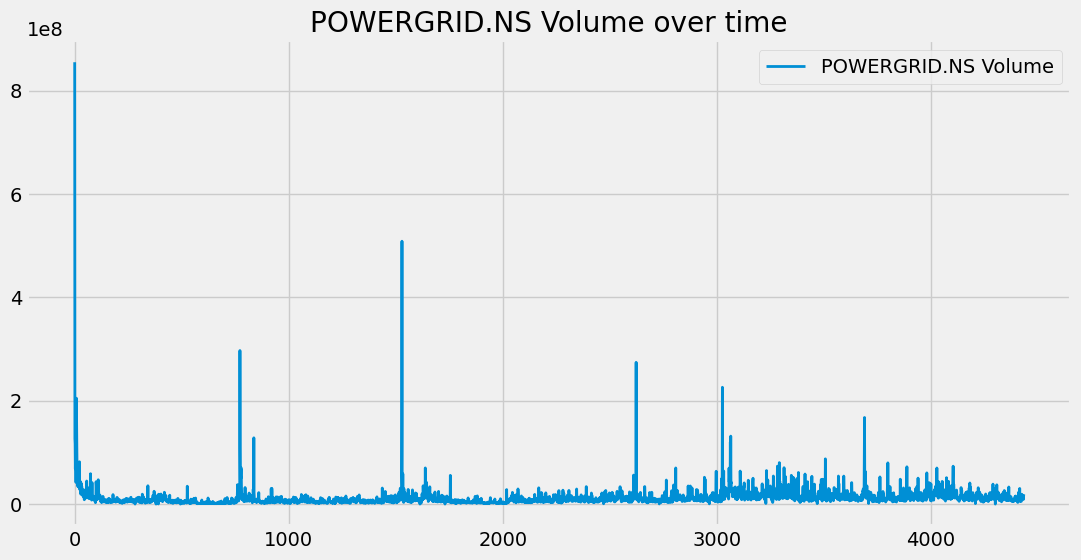

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [ ]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [ ]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [ ]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [ ]:
ma100 = df.Close.rolling(100).mean()

In [ ]:
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4430,290.926364
4431,290.707607
4432,290.432500
4433,290.169271


In [ ]:
ma200 = df.Close.rolling(200).mean()

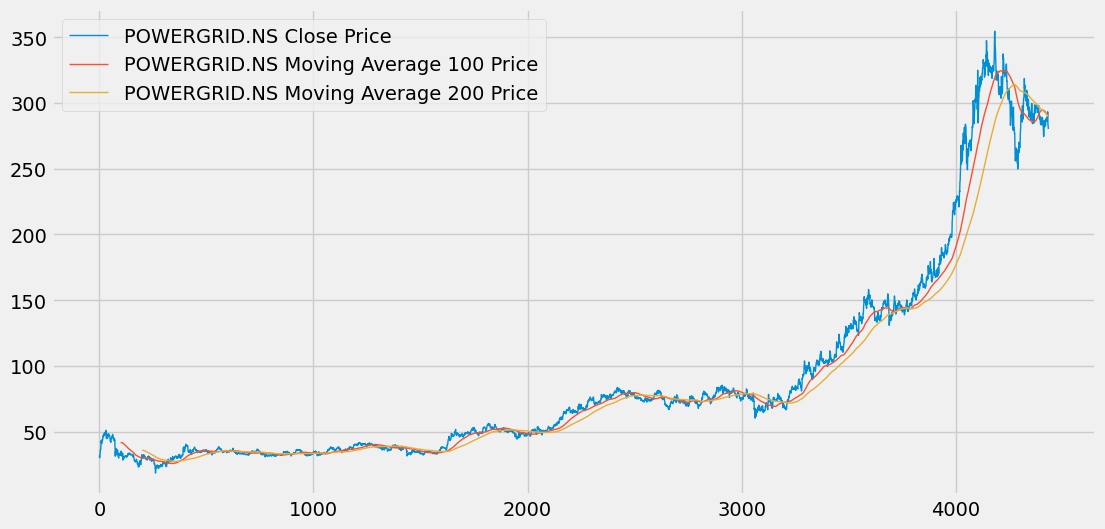

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [ ]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

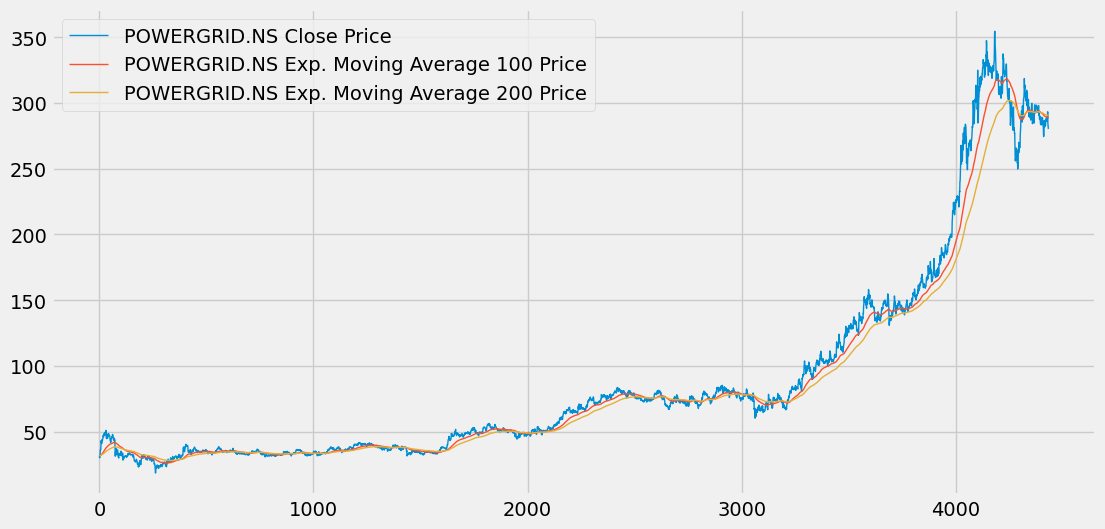

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

# Training & Testing

In [ ]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [ ]:
data_training.shape

(3104, 1)

In [ ]:
data_testing.shape

(1331, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)

In [ ]:
data_training_array

array([[0.19808593],
       [0.17371827],
       [0.20447374],
       ...,
       [0.69010874],
       [0.71235131],
       [0.71485752]])

In [ ]:
data_training_array.shape[0]

3104

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(3004, 100, 1)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

## LSTM Input -> 3D Array (batch_size, time_steps, seq_len) LSTM 2D OR 3D 2D -> (batch_sizem units) 3D -> (batch_size, time_steps, units)

In [ ]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 33s 257ms/step - loss: 0.0741
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 274ms/step - loss: 0.0085
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 258ms/step - loss: 0.0069
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 256ms/step - loss: 0.0073
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 256ms/step - loss: 0.0070
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 256ms/step - loss: 0.0060
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 255ms/step - loss: 0.0056
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 255ms/step - loss: 0.0052
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 23s 246ms/step - loss: 0.0050
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 254ms/step - loss: 0.0047
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 254ms/step - loss: 0.0046
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 257ms/step - loss: 0.0042
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 256ms/step - loss: 0.0040
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 40s 247ms/step - loss: 0.0037
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 

In [49]:
past_100_days = data_training.tail(100)

In [51]:
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)

In [52]:
final_df.head()

Ticker,POWERGRID.NS
0,74.937347
1,75.481850
2,74.554199
3,76.248154
4,76.752319


In [53]:
input_data = scaler.fit_transform(final_df)

In [54]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [55]:
x_test.shape

(1331, 100, 1)

In [56]:
y_predicted = model.predict(x_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step


In [57]:
y_predicted.shape

(1331, 1)

In [58]:
scaler.scale_

array([0.00339787])

In [59]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

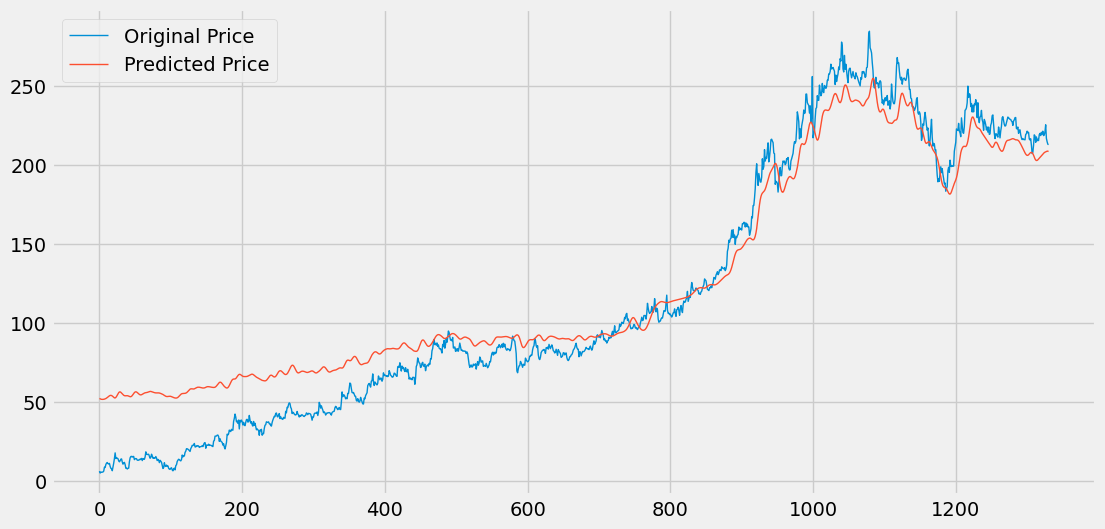

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [61]:
model.save('stock_dl_model.h5')